In [1]:
import networkx as nx
import getpass
from pymks.fmks.knowledgebase.cordrapy import Token
from pymks.fmks.knowledgebase.materials_schema import Material, Process

In [2]:
username = 'svenpvoigt'

In [3]:
password = getpass.getpass()

In [4]:
token = Token.create('https://api.materialhub.org',username,password,verify=False)

In [5]:
m = Material(name='Steel', token=token['access_token'])
m.getid()

In [6]:
m.u0040id

'test/7ef3eb55be8534a94dda'

In [7]:
m2 = Material(token=token['access_token'])
m2.loadbyid(m.u0040id)

m2.json()

{"@context":["http://schema.org/",{"mat":"https://pages.nist.gov/material-schema/","parameterControlled":"mat:parameterControlled","variableMeasured":"mat:variableMeasured"}],"@type":["CreativeWork","mat:Material"],"@id":"test/7ef3eb55be8534a94dda","name":"Steel","u0040id":"","host":"https://api.materialhub.org","token":"1jtv7gcsmy23rp054oolhsics","className":"Material","metadata":{"createdOn":1601679257277,"createdBy":"test/98e182d04a2a56bdd28a","modifiedOn":1601679257277,"modifiedBy":"test/98e182d04a2a56bdd28a","txnId":1601679257277012}}


'{"u0040id": "", "host": "https://api.materialhub.org", "token": "1jtv7gcsmy23rp054oolhsics", "name": "", "className": "Material", "prv": null, "nxt": null, "supplyFor": null, "exampleOfWork": null}'

In [9]:
class CordraModel(BaseModel):
    '@type': str
    uuid: UUID
    _type: str
        
c = CordraModel()

SyntaxError: illegal target for annotation (<ipython-input-9-5a5a9a3d60df>, line 2)

In [20]:
class Process(CordraModel):
    name: str
    nxt: 'Material'
    prv: 'Material'
    characterized_by: 'Dataset' = Field(None)
        
class Material(BaseModel):
    name: str
    nxt: 'Process' = Field(None)
    prv: 'Process' = Field(None)
    characterized_by: 'Dataset' = Field(None)
        
        
class Dataset(BaseModel):
    characterizes: Union['Material', 'Process']
    image: FilePath = Field(None)
        

Process.update_forward_refs()
Material.update_forward_refs()

incr = lambda s: chr(ord(s) + 1)
decr = lambda s: chr(ord(s) - 1)
        
mats = dict(zip('abcd', [Material(name=s) for s in 'abcd']))
prcs = dict(zip('abc', [Process(name=s, nxt=mats[incr(s)], prv=mats[s]) for s in 'abc']))

for key, val in mats.items():
    if not (decr(key) < 'a'):
        val.prv = prcs[decr(key)]
    if not (key > 'c'):
        val.nxt = prcs[key]
        
type(mats['a']).__name__

'Material'

In [14]:
class ProcessGraph(Graph):
    def n(self, obj):
        self.add_node(obj.name, data=obj, _type=type(obj).__name__)
        
    def e(self, obj1, obj2):
        self.add_edge()
    
    def add_matl(self, M):
        self.n(M)
        if M.nxt:
            self.n(M.nxt)
        if M.prv:
            self.n(M.prv)
            
    def add_proc(self, P):
        

dol = {'a': ['b'], 'b': ['a', 'c'], 'c': ['b', 'd'], 'd': ['c', 'e'], 'e': ['d', 'f'], 'f': ['g']}  # single edge (0,1)

Process.from_dict_of_lists(dol)

AttributeError: type object 'Process' has no attribute 'from_dict_of_lists'

In [6]:
new_schema = BaseModel.parse_raw(material_json)

In [23]:
X = '{"@context":["http://schema.org/",{"mat":"https://pages.nist.gov/material-schema/","measurementTechnique":"mat:measurementTechnique","parameterControlled":"mat:parameterControlled","variableMeasured":"mat:variableMeasured"}],"@type":["HowTo","mat:ProcessHistory"],"@id":"test/c911297212d955d65050","name":"junk","description":"blah","supply":[{"@type":["HowToSupply","mat:Material"],"identifier":"test/e017023c024b9cd19280","requiredQuantity":{"@type":"QuantitativeValue"}}],"estimatedCost":{"@type":"MonetaryAmount"},"yield":{"@type":"QuantitativeValue"},"metadata":{"createdOn":1599848954663,"createdBy":"test/8464245f615855c1ef20","modifiedOn":1600453025635,"modifiedBy":"test/98e182d04a2a56bdd28a","txnId":1600453025628001}}'

import json

print(json.dumps(json.loads(X), indent=2))

{
  "@context": [
    "http://schema.org/",
    {
      "mat": "https://pages.nist.gov/material-schema/",
      "measurementTechnique": "mat:measurementTechnique",
      "parameterControlled": "mat:parameterControlled",
      "variableMeasured": "mat:variableMeasured"
    }
  ],
  "@type": [
    "HowTo",
    "mat:ProcessHistory"
  ],
  "@id": "test/c911297212d955d65050",
  "name": "junk",
  "description": "blah",
  "supply": [
    {
      "@type": [
        "HowToSupply",
        "mat:Material"
      ],
      "identifier": "test/e017023c024b9cd19280",
      "requiredQuantity": {
        "@type": "QuantitativeValue"
      }
    }
  ],
  "estimatedCost": {
    "@type": "MonetaryAmount"
  },
  "yield": {
    "@type": "QuantitativeValue"
  },
  "metadata": {
    "createdOn": 1599848954663,
    "createdBy": "test/8464245f615855c1ef20",
    "modifiedOn": 1600453025635,
    "modifiedBy": "test/98e182d04a2a56bdd28a",
    "txnId": 1600453025628001
  }
}


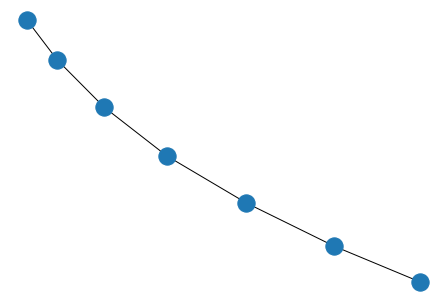

In [4]:
dol = {'a': ['b'], 'b': ['a', 'c'], 'c': ['b', 'd'], 'd': ['c', 'e'], 'e': ['d', 'f'], 'f': ['g']}  # single edge (0,1)
G = nx.from_dict_of_lists(dol)
nx.draw(G)

In [13]:
import json 

print(json.dumps(mats['b'].dict(), indent=2))

{
  "name": "b",
  "nxt": {
    "name": "b",
    "nxt": {
      "name": "c",
      "nxt": null,
      "prv": null,
      "characterized_by": null
    },
    "prv": {
      "name": "b",
      "nxt": null,
      "prv": null,
      "characterized_by": null
    },
    "characterized_by": null
  },
  "prv": {
    "name": "a",
    "nxt": {
      "name": "b",
      "nxt": null,
      "prv": null,
      "characterized_by": null
    },
    "prv": {
      "name": "a",
      "nxt": null,
      "prv": null,
      "characterized_by": null
    },
    "characterized_by": null
  },
  "characterized_by": null
}
